# Exercise 1
## Monte Carlo computation of π

In [69]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [70]:
def getDataFor(path):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        return [[int(row[0]),int(row[1]), float(row[2])] for row in csv_reader]

def chunk(it, size):
    it = iter(it)
    return list(iter(lambda: tuple(islice(it, size)), ()))


def sortData(list):
    a = []
    b = []
    c = []
    d = []
    for i in range(0,len(list),4):
        a = [list[i]] + a
        b = [list[i+1]] + b
        c = [list[i+2]] + c
        d = [list[i+3]] + d
    return [a,b,c,d]


testsPerSlot = 4
monteCarlo = sortData(getDataFor('task1/pi/output.csv'))
heatStencil = sortData(getDataFor('task1/heatStencil/output.csv'))
matMul = sortData(getDataFor('task2/output.csv'))


print(monteCarlo[0])

[[1, 100000, 0.002585], [2, 100000, 0.001265], [4, 100000, 0.000748], [8, 100000, 0.005096]]


In [71]:
def plot2(ax1, data, title = "", typeOfGrahp=""):
    cores = [1,2,4,8,16]
    ax2 = ax1.twinx()
    for problemSize in range(0,4):
        

        cores = [ i[0] for i in data[problemSize] ]
        reference = data[problemSize][0][2]
        speedup = [ reference/i[2] for i in data[problemSize] ]
        efficency = [ speedup[i] / cores[i] for i in range(0,len(cores)) ]
        ax1.set_xlabel('number of processors')
        ax1.set_ylabel('Speedup')
        ax1.set_title(title)
        ax1.plot(cores, speedup, label="Speedup {}".format(data[problemSize][1][1]) +" "+ typeOfGrahp , marker='o',  linewidth=3, color=['red','green', 'blue', 'black'][problemSize])
        ax2.set_ylabel("Efficency")
        ax2.plot( cores, efficency, label="Efficency {}".format(data[problemSize][1][1]) +" "+ typeOfGrahp , marker='o', color=['orange','aquamarine','chartreuse', 'pink'][problemSize], linewidth=3)
        ax1.legend(loc='lower left')
        ax2.legend(loc='lower right')


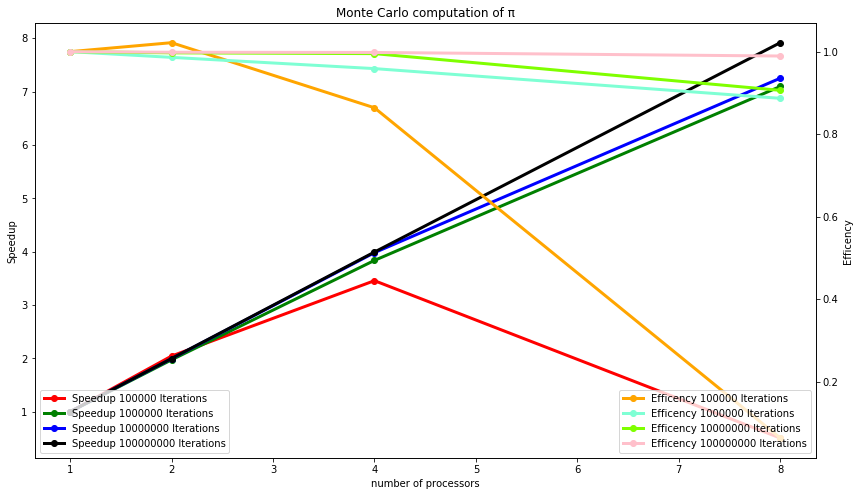

In [72]:
plt.rcParams["figure.figsize"] = (14,8)
fig, ax1 = plt.subplots(1,1)
plot2(ax1, monteCarlo, "Monte Carlo computation of π", "Iterations")
plt.show() 

## Heat Stencil

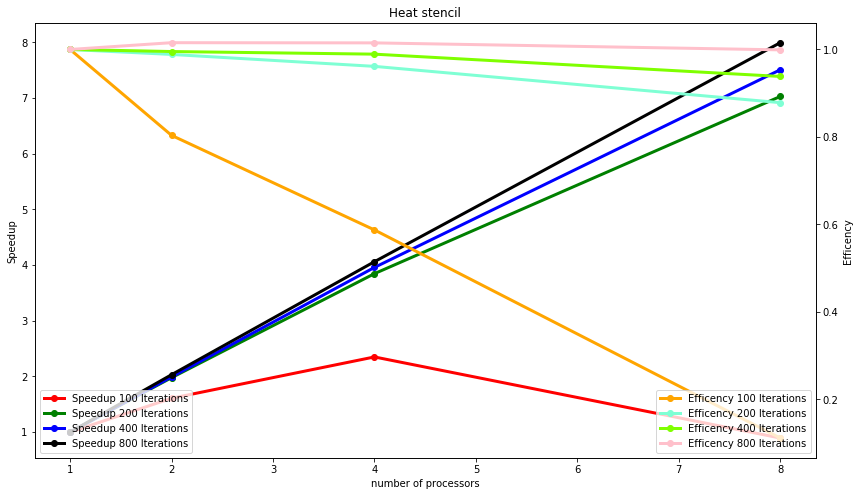

In [73]:
plt.rcParams["figure.figsize"] = (14,8)
fig, ax1 = plt.subplots(1,1)
plot2(ax1, heatStencil, "Heat stencil", "Iterations")
plt.show() 

# Exercise 2
## Matrix Multiplication

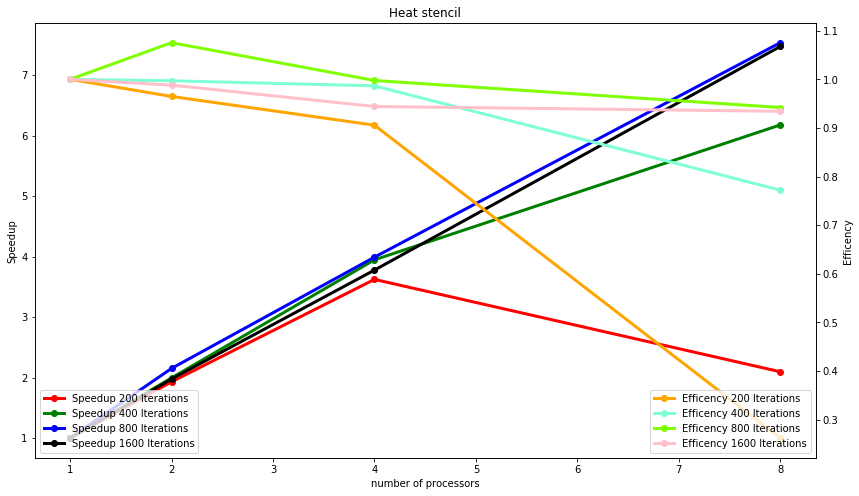

In [74]:
plt.rcParams["figure.figsize"] = (14,8)
fig, ax1 = plt.subplots(1,1)
plot2(ax1, matMul, "Heat stencil", "Iterations")
plt.show() 